In [ ]:
from PIL import Image
import numpy as np
import os
import cv2
from tifffile import imread
import glob
from skimage import io, filters, feature, morphology, exposure
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from skimage.draw import rectangle_perimeter
from pathlib import Path
from glob import glob
import imageio.v2 as imageio

In [ ]:
input_dir = Path("Datasets\\Raw_Images")
input_files = list(input_dir.glob("*.tiff"))
print(input_files.__len__())

35


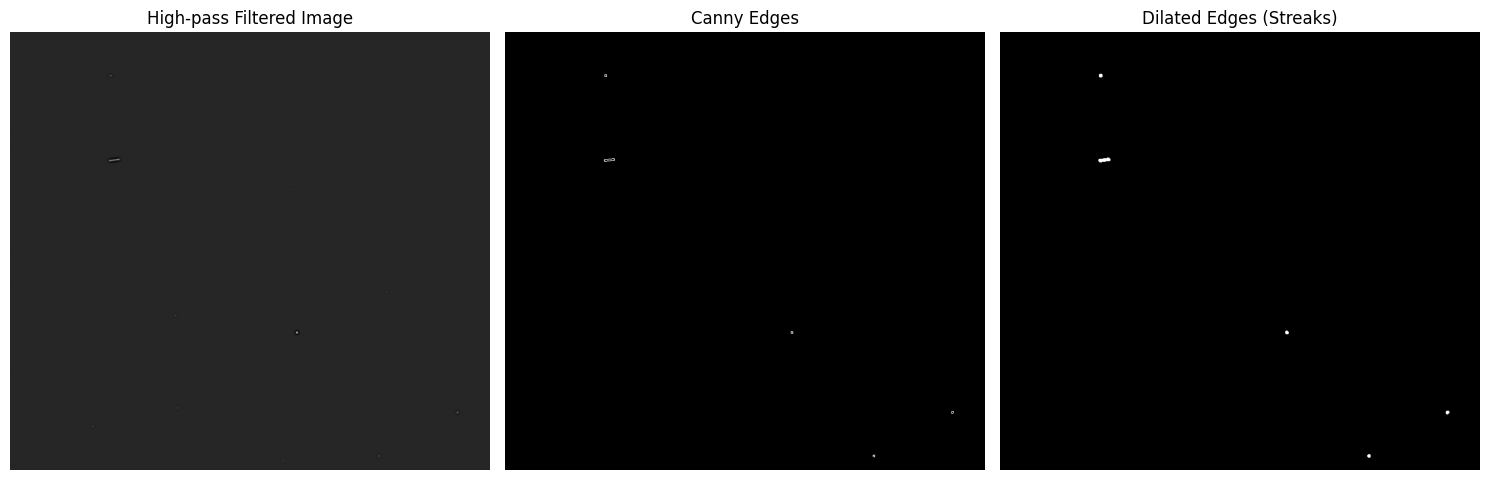

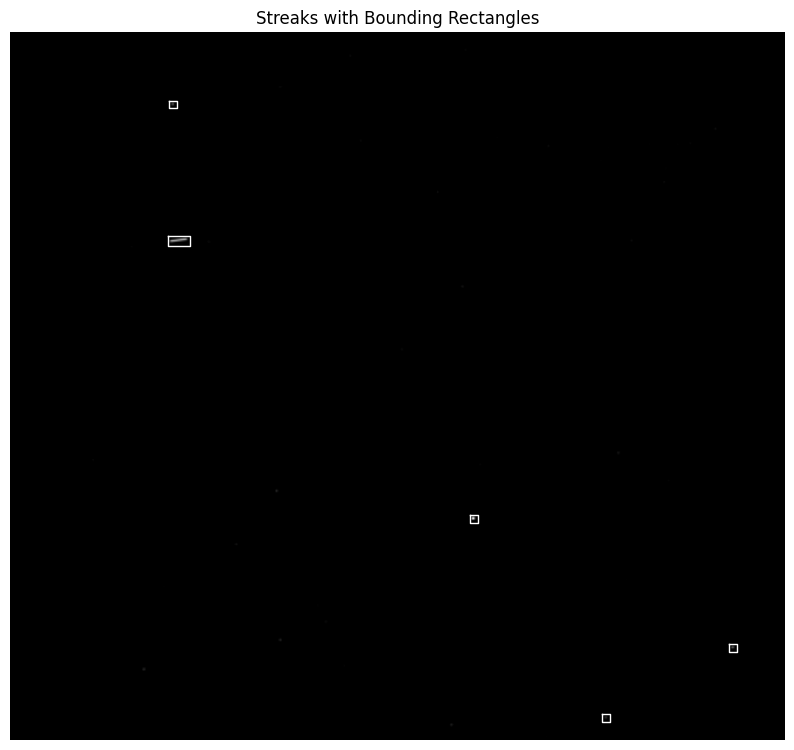

In [ ]:
# Load the enhanced PNG image
image_path = Path("C:\\Users\\NARINDER\\Desktop\\test.png")
image = io.imread(image_path, as_gray=True)

# Apply Gaussian blur for high-pass filtering
blurred = filters.gaussian(image, sigma=2)
highpass = image - blurred

# Enhance contrast for better edge detection
highpass_eq = exposure.equalize_adapthist(highpass)

# Detect edges using Canny
edges = feature.canny(highpass_eq, sigma=1)

# Apply morphological operations to strengthen streaks
edges_dilated = morphology.dilation(edges, morphology.disk(1))

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(highpass, cmap='gray')
axes[0].set_title("High-pass Filtered Image")
axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Canny Edges")
axes[2].imshow(edges_dilated, cmap='gray')
axes[2].set_title("Dilated Edges (Streaks)")
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Label connected regions
labels = measure.label(edges_dilated)
regions = measure.regionprops(labels)

# Plot with bounding rectangles
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image, cmap='gray')

for region in regions:
    if region.area > 20:  # Filter out small noise regions
        minr, minc, maxr, maxc = region.bbox
        rr, cc = rectangle_perimeter(start=(minr, minc), end=(maxr, maxc), shape=image.shape)
        ax.plot(cc, rr, color='white', linewidth=1)

plt.title("Streaks with Bounding Rectangles")
plt.axis('off')
plt.show()


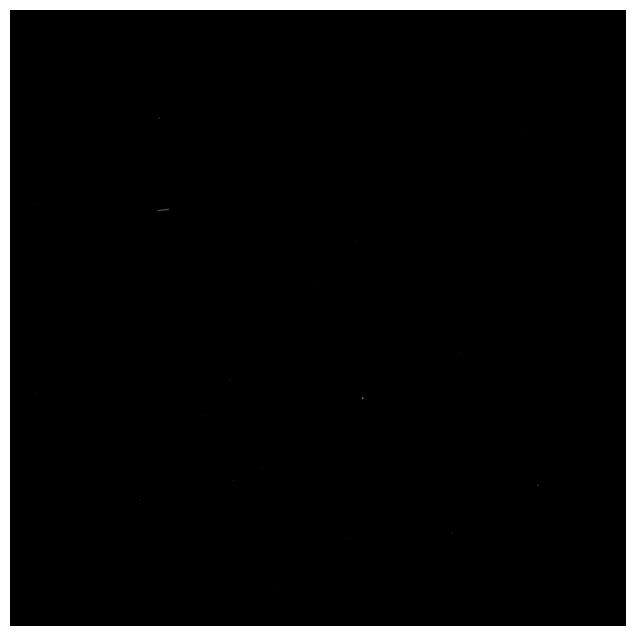

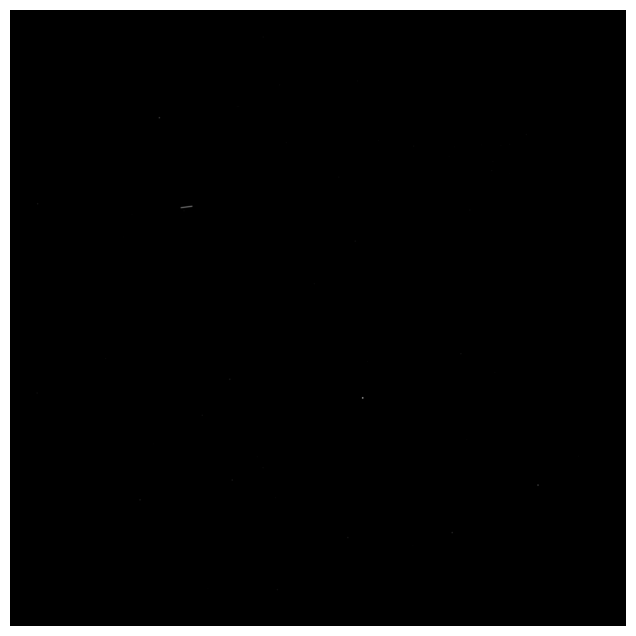

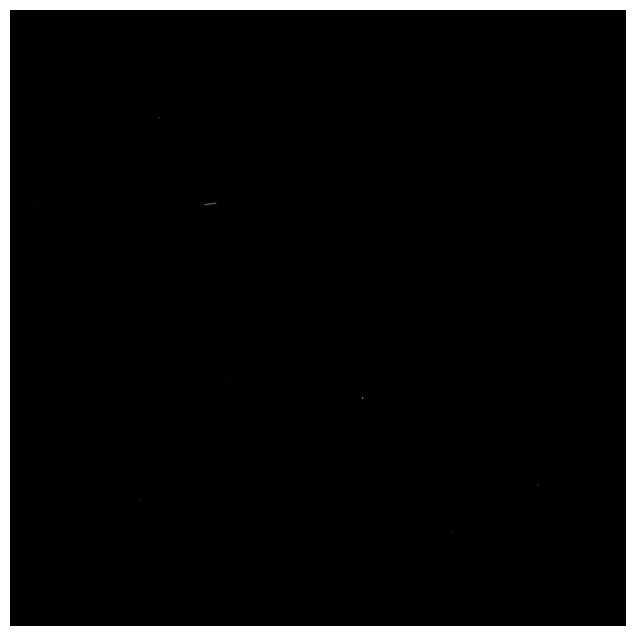

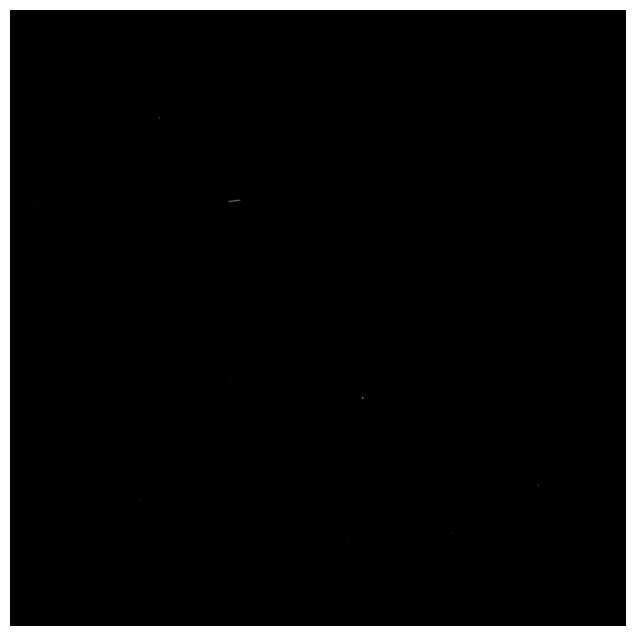

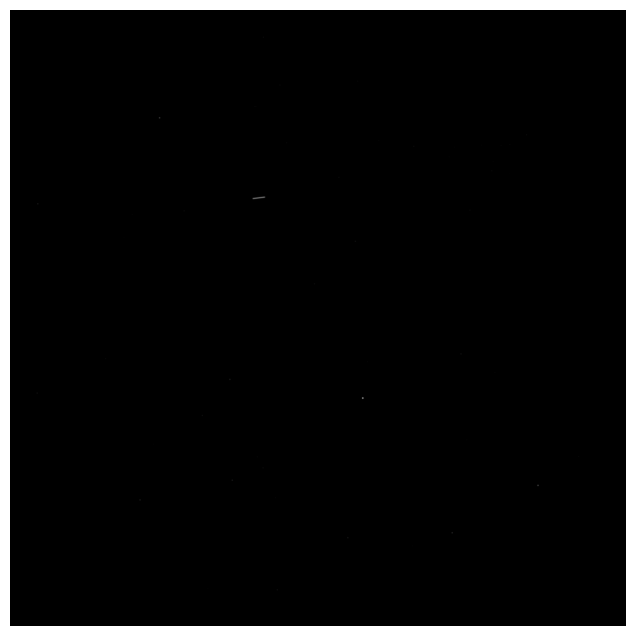

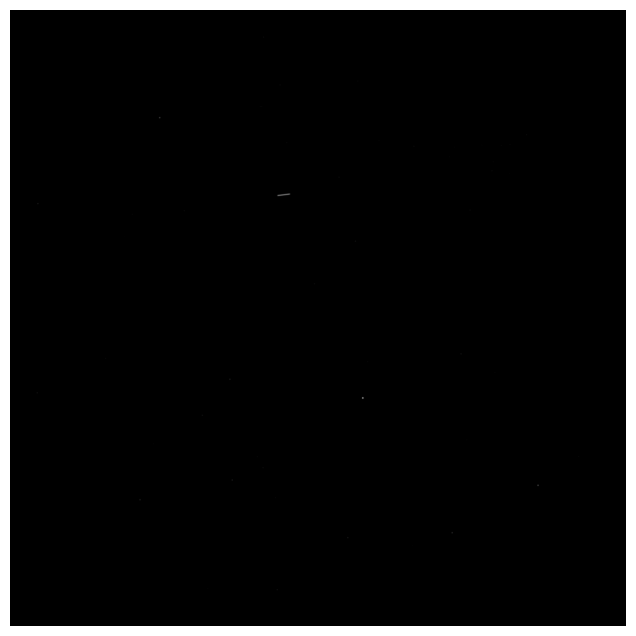

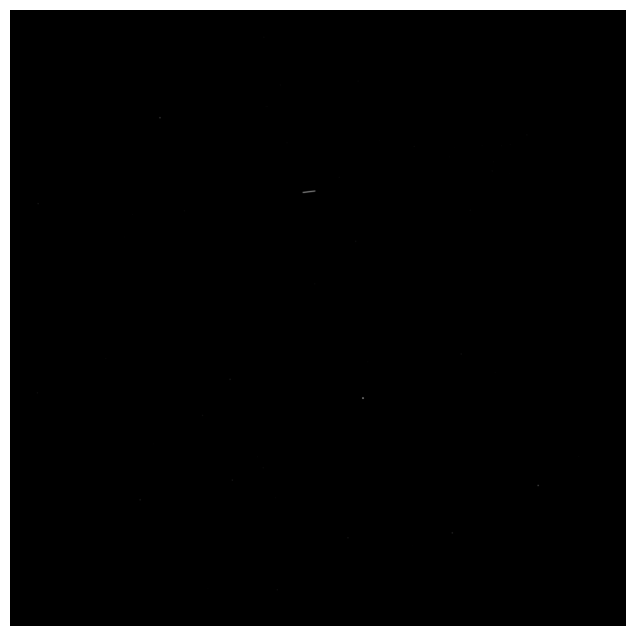

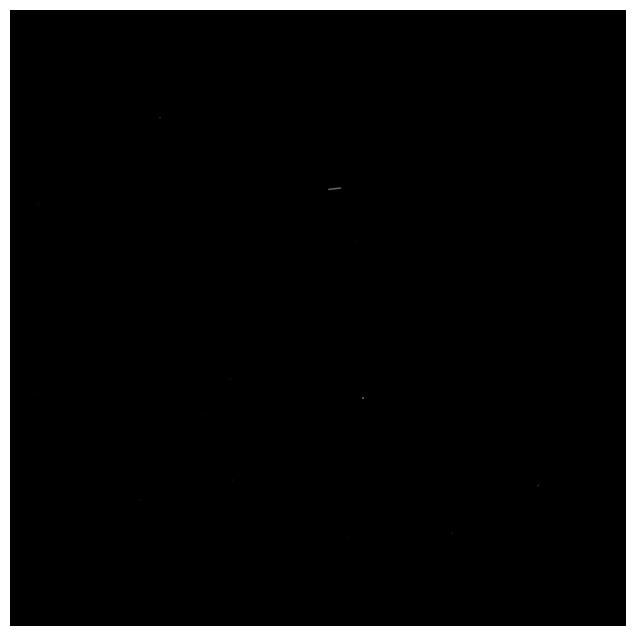

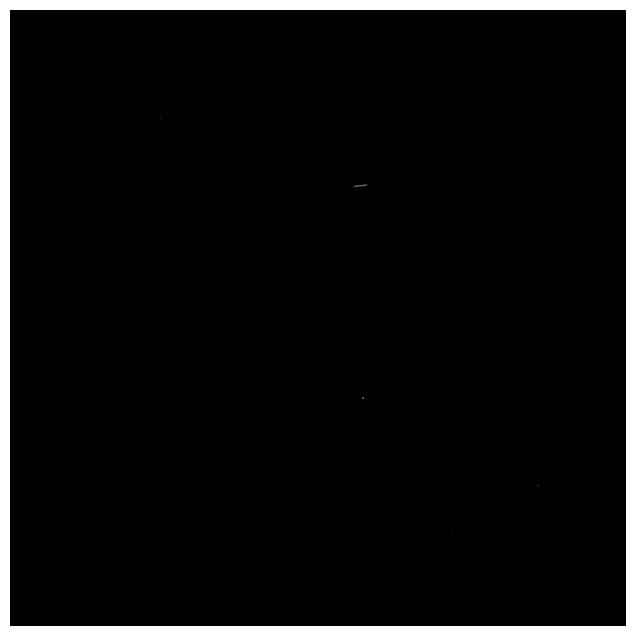

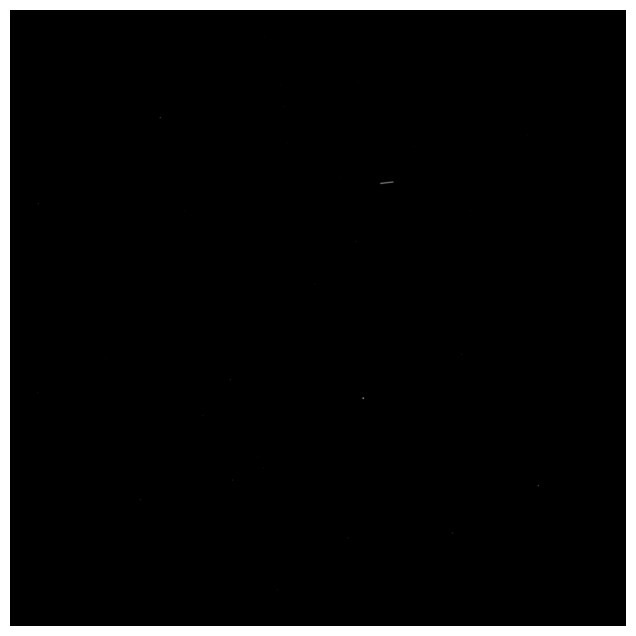

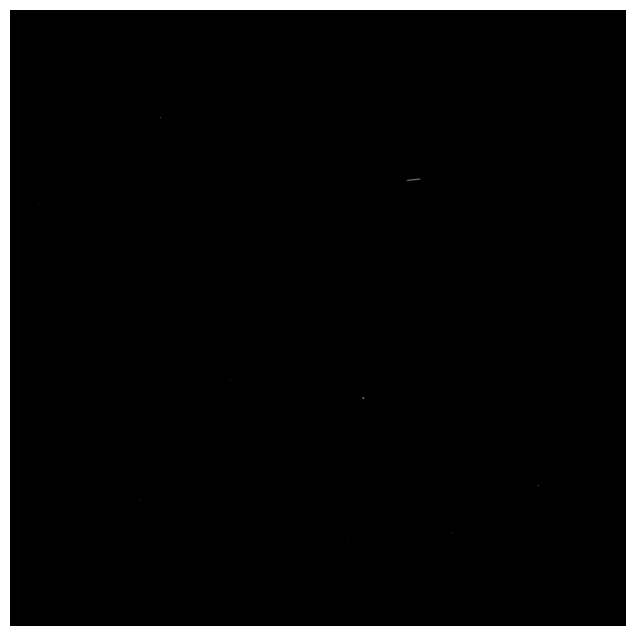

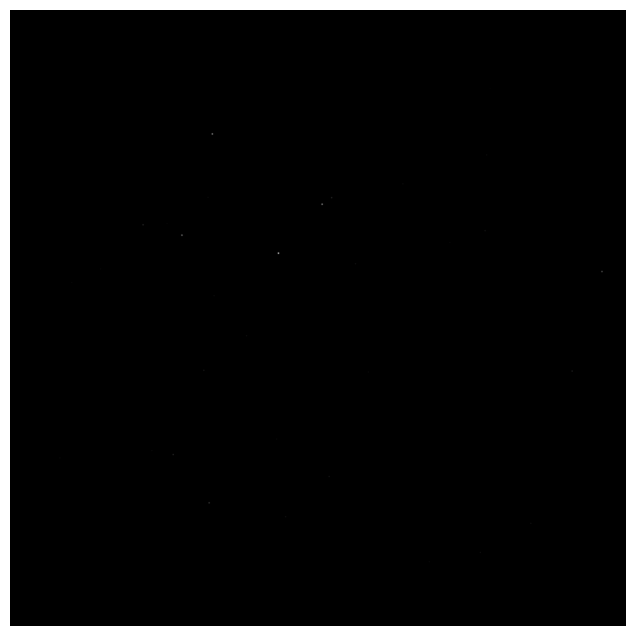

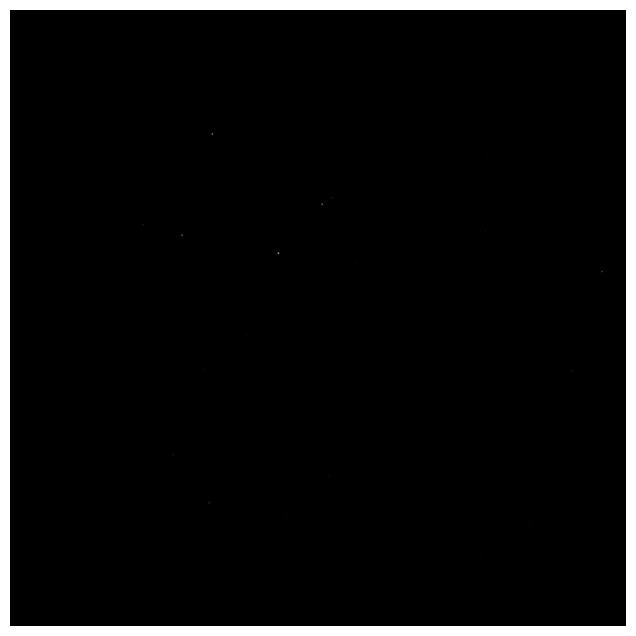

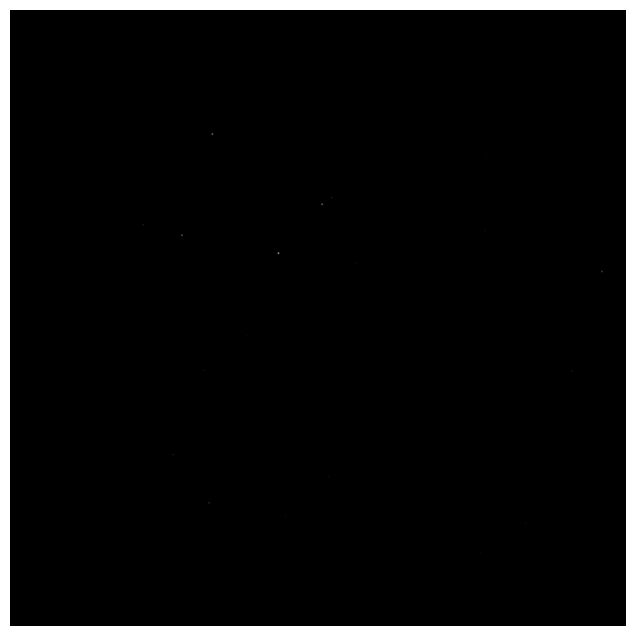

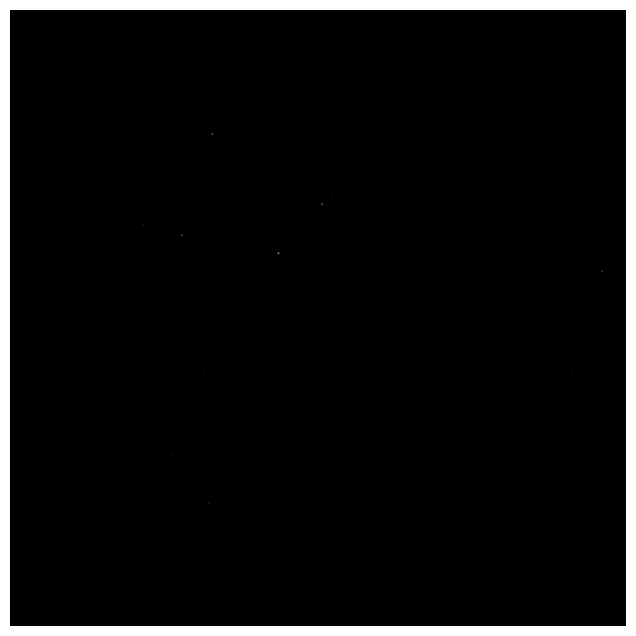

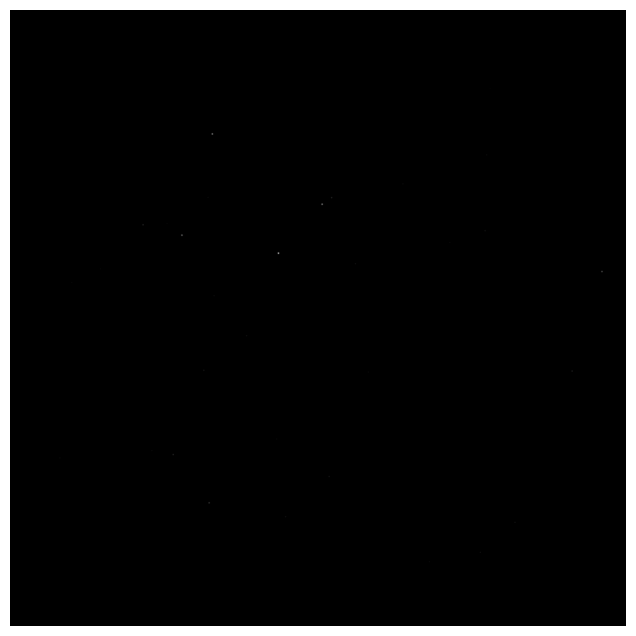

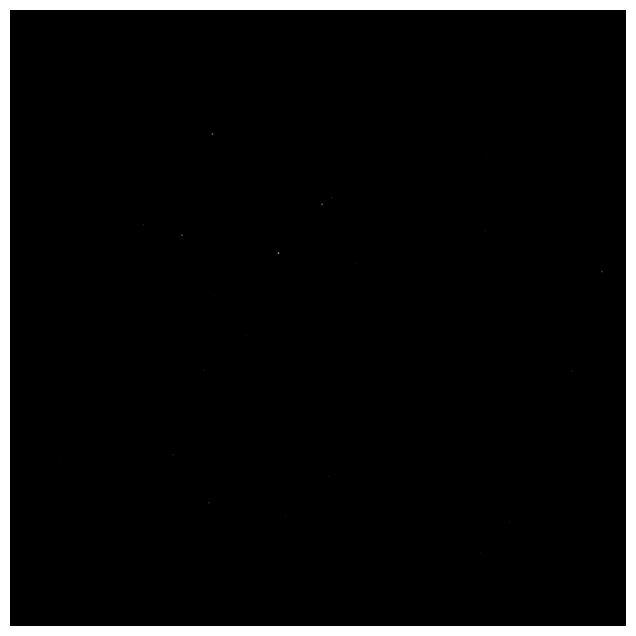

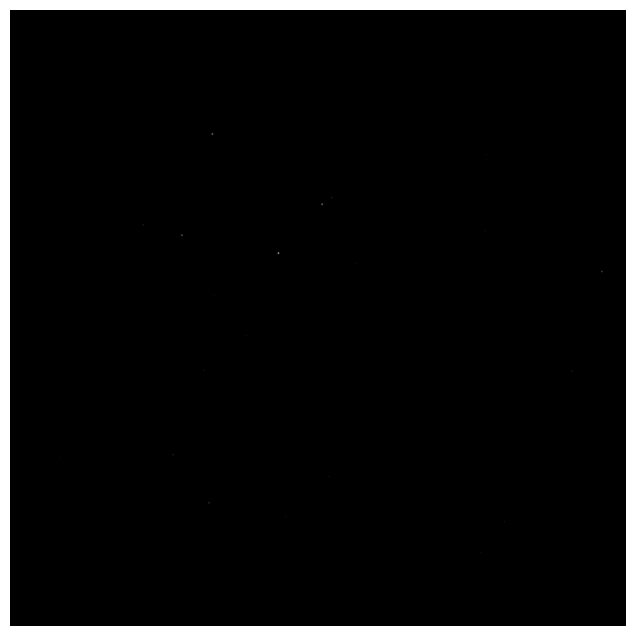

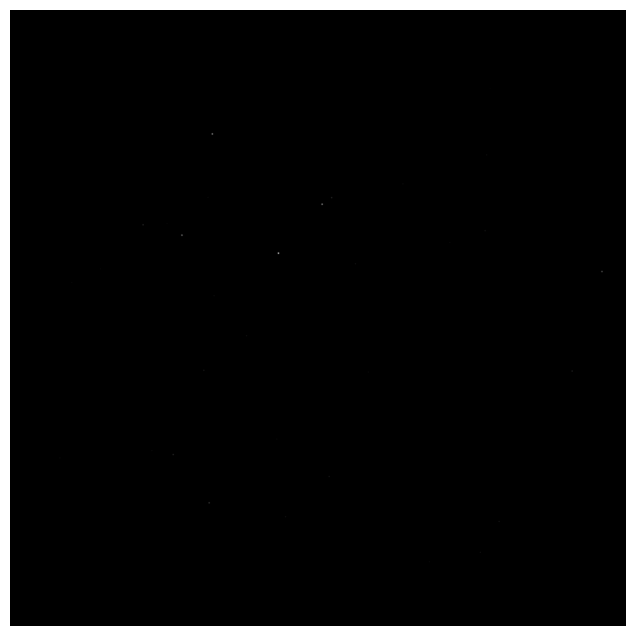

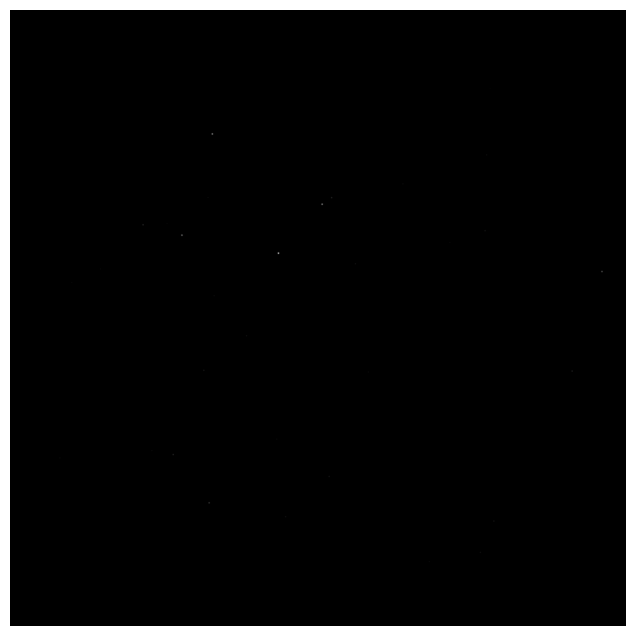

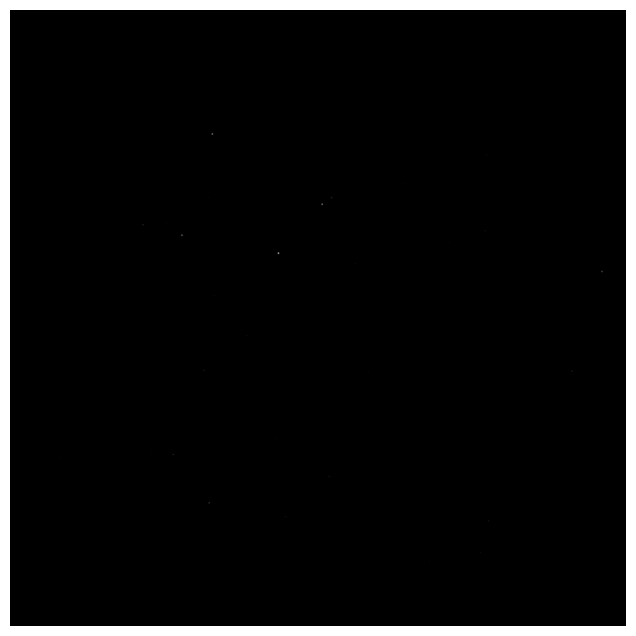

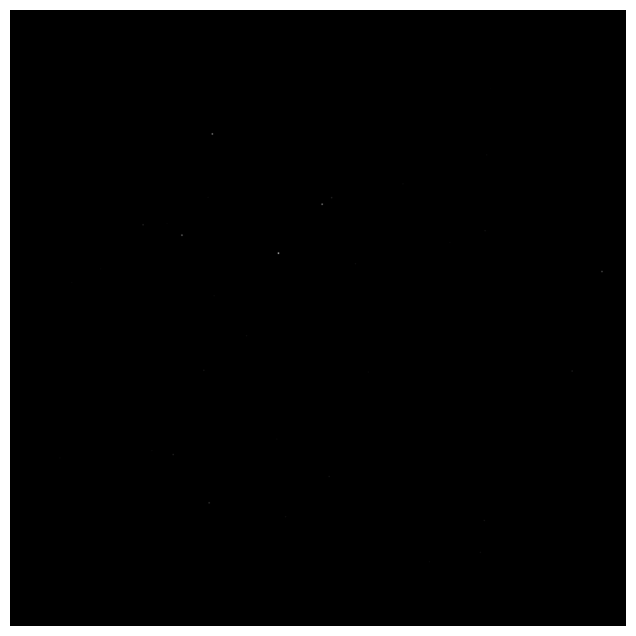

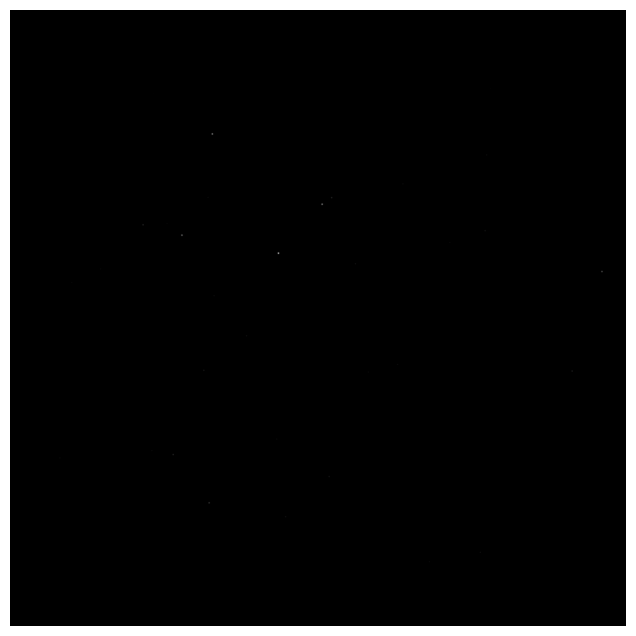

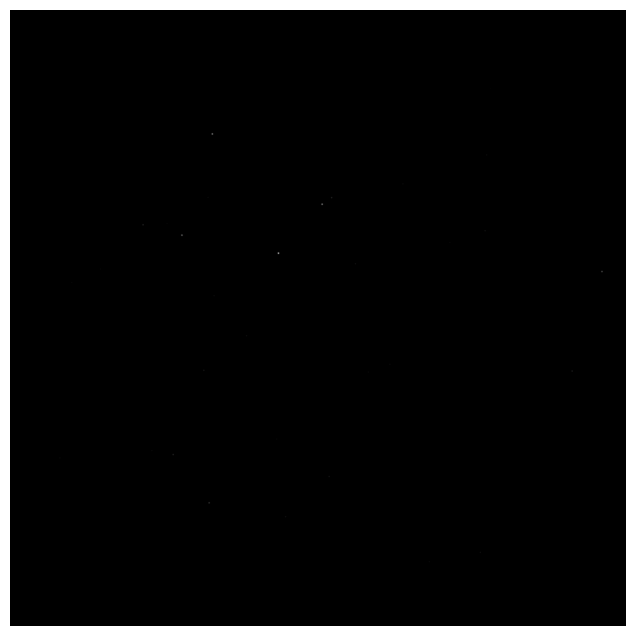

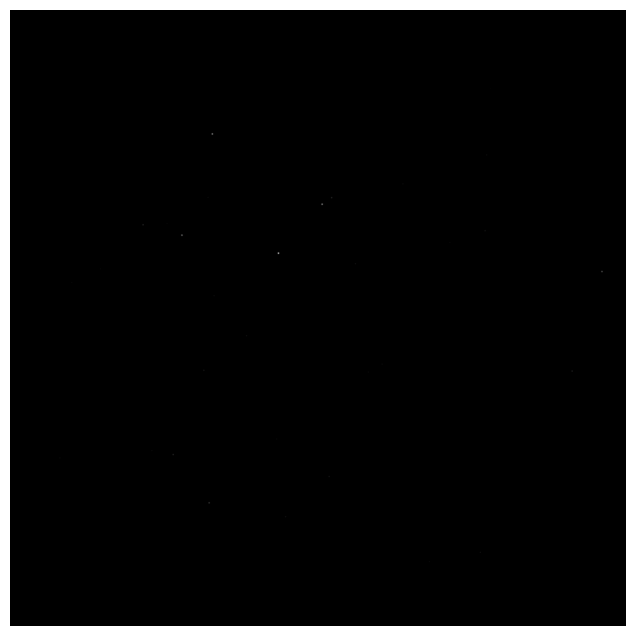

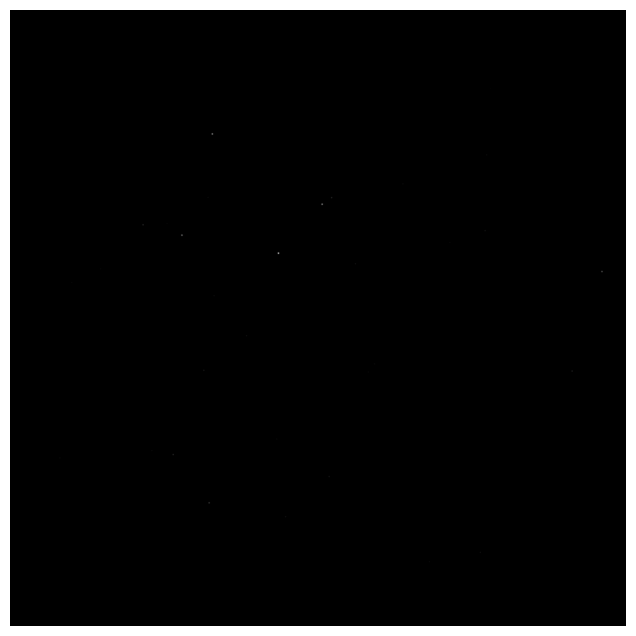

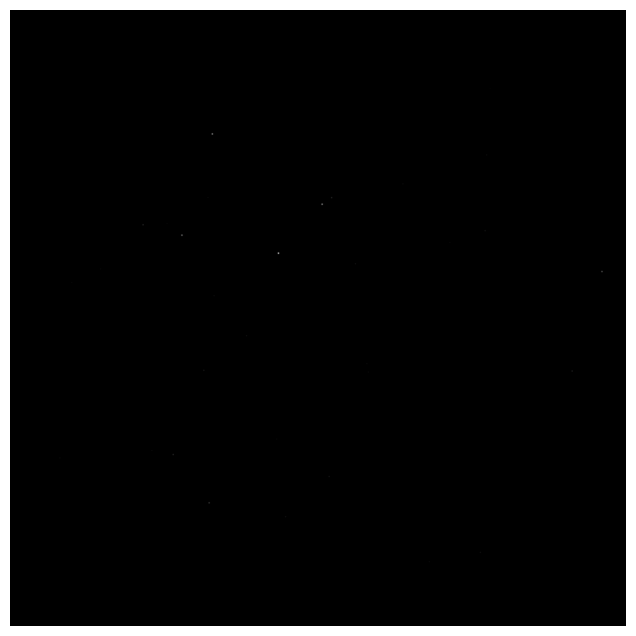

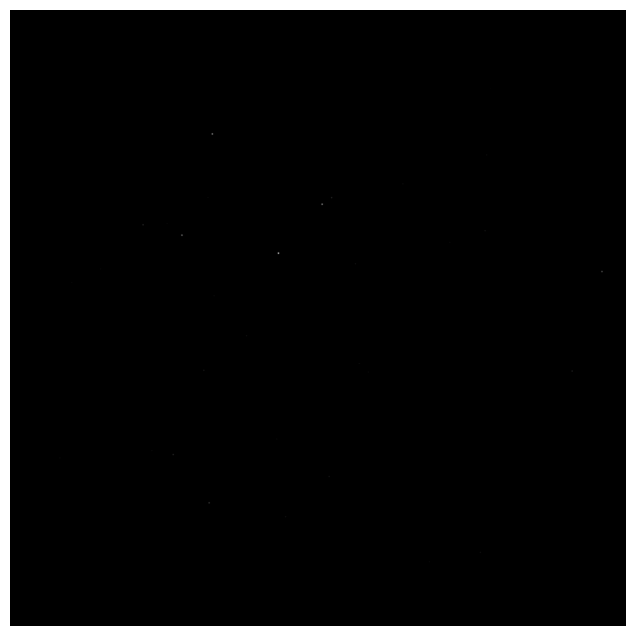

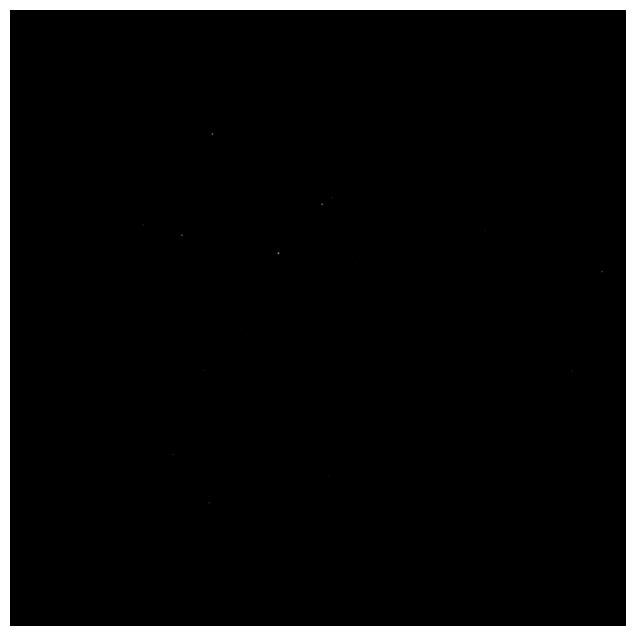

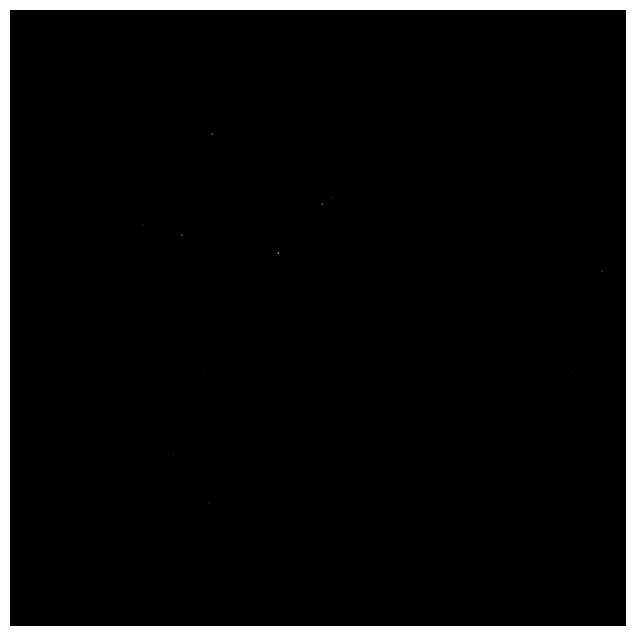

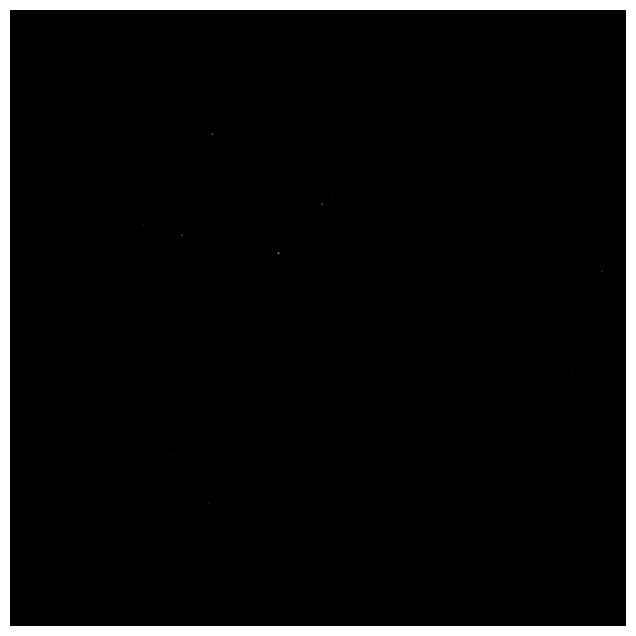

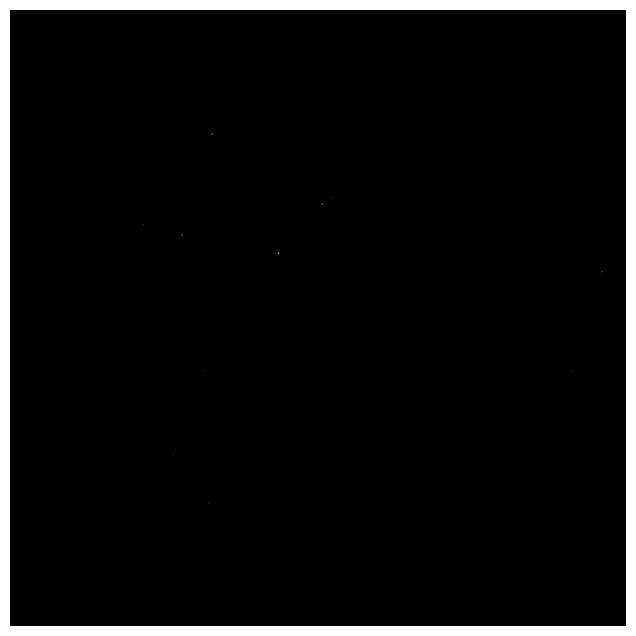

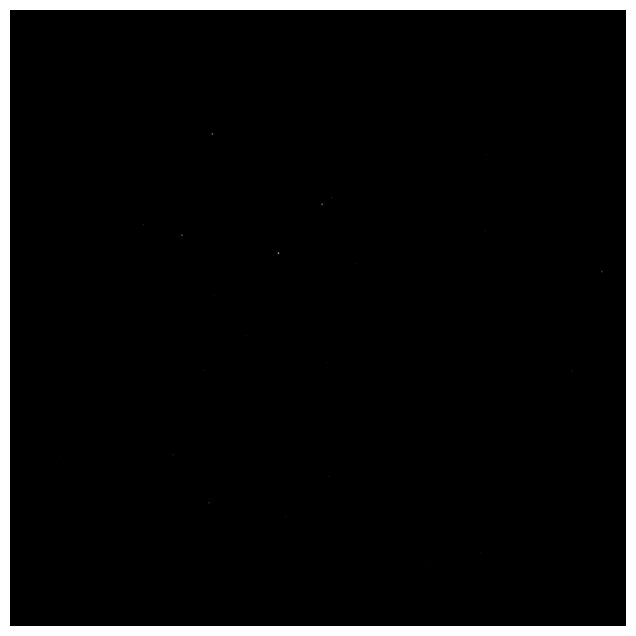

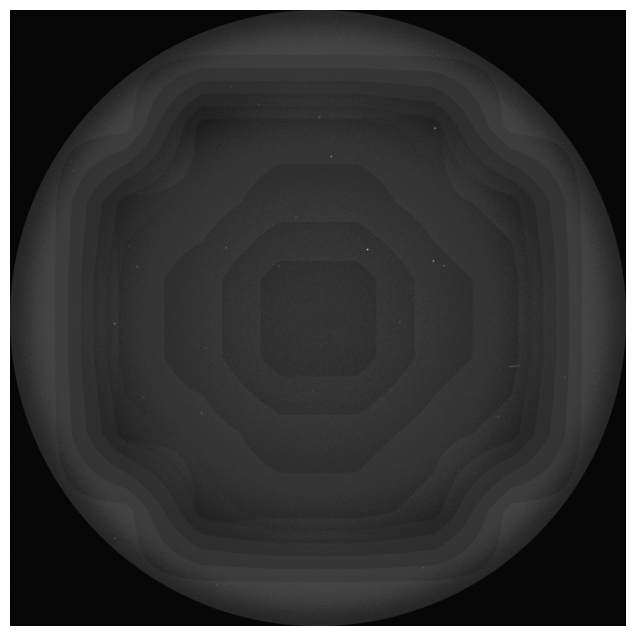

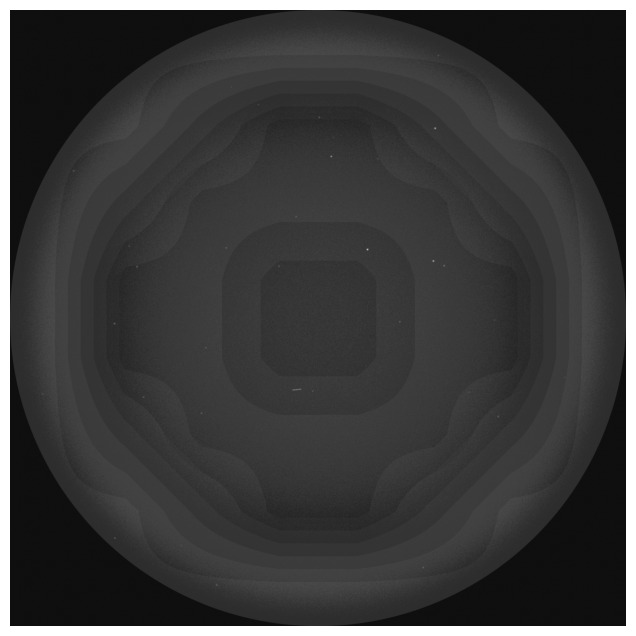

In [ ]:
# Directories
input_dir = "Datasets/Raw_images"
output_dir = "Datasets/enhanced_images"
os.makedirs(output_dir, exist_ok=True)

# Helper: Display and Save Image as Plot
def show_image(img, cmap='gray', save_path=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()

# Process each image
for filepath in glob(os.path.join(input_dir, "*.tiff")):
    filename = os.path.basename(filepath)
    name, _ = os.path.splitext(filename)

    # Load grayscale image
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    # Contrast Enhancement using CLAHE
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(image)

    # Save the visualized plot
    plot_path = os.path.join(output_dir, f"{name}_enhanced_plot.png")
    show_image(enhanced, save_path=plot_path)